## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [45]:
%pylab inline
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
#Hm... if using statsmodels, be sure to disambiguate name from scipy.stats?

Populating the interactive namespace from numpy and matplotlib


In [4]:
df = pd.read_csv('data/human_body_temperature.csv')

In [4]:
#Exploratory cells
df.head()

###FUTURE NOTE TO SELF: Review how to upload created functions in Python

,temperature,gender,heart_rate
0,99.3,F,68
1,98.4,F,81
2,97.8,M,73
3,99.2,F,66
4,98.0,F,73


In [14]:
len(df)

130

## Question 1

*Is the distribution of temperatures normal?*

( CLT = Central Limit Theorem (CLT) )

So... properties of a normal distribution that may be worth testing
- symetricality? (did not test)
- how well it's approximated by a generated normal dist with the same mean and STD
- visual confirmation

I ended up using visual confirmation (see histograms below), and applying a Shapiro-Wilk test.

I interpretted the S-W test in light of the outcomes and p-values associated with a random sample of the same size from the generated normal distribution. After comparing these two, I reached the conclusion that while on the surface the distribution seems approximately normal, the S-W p-value seems to suggest that it's far from a perfect approximation.

Some context: Lower S-W values are associated with a less Normal-like distribution, and higher p-values are associated with good fit to a normal distribution. p>0.95 is the relevant highly-significant range here.

**From Dataframe data**
- Shapiro-Wilk Test Stat:  0.9865770936012268
- p-value:  0.233174666762352

**Average from 7 simulated samples of size 130**
- Shapiro-Wilk Test Stat: 0.99237788575
- p-value: 0.685658173902

If I wanted to be more thorough, I'd probably try to derive a p-value from the simulated Shapiro-Wilk Test Stats? I wanted to move on to the next question.

In [8]:
#First things first, lets do basic EDA on this thing.
TempMean = mean(df.temperature)
TempStd = std(df.temperature)

print ("Mean: ", TempMean)
print ("STD: ", TempStd)

Mean:  98.24923076923078
STD:  0.7303577789050377


In [10]:
##Develop a perfect null distribution, and sample from it
AllTempNorm = stats.norm(TempMean, TempStd)
NormSamp = AllTempNorm.rvs(size=130)

In [19]:
type(AllTempNorm)

scipy.stats._distn_infrastructure.rv_frozen

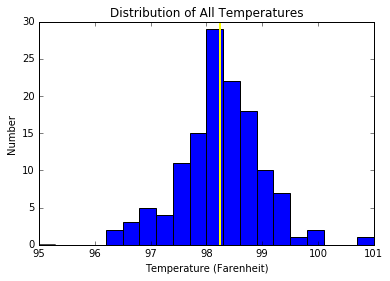

In [43]:
##Simple visual confirmation
#Sample's Histogram

plt.hist(df.temperature, bins=20, range=[95,101])
plt.axvline(TempMean, linewidth=2, color='yellow')
plt.title('Distribution of All Temperatures')
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Number')
plt.show()

#It actually looks like it could be normal or lognormal-ish to me.
#But with a pretty small sample size that leaves a lot of bumpiness.

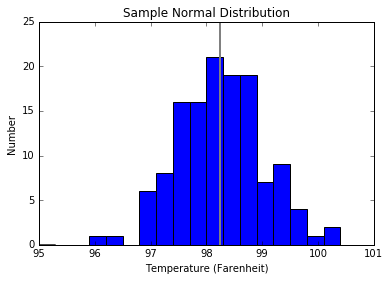

In [17]:
#Generated Normal Dist Histogram
NormSamp = AllTempNorm.rvs(size=130)
plt.hist(NormSamp, bins=20, range = [95,101])
plt.axvline(NormSamp.mean(), linewidth=2, color='gray')
plt.title('Sample Normal Distribution')
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Number')
plt.show()
#When I run this multiple times, the outputs are pretty variable in appearance.

In [26]:
?plt.hist(bins=20, range=[], histtype='step', color='red')

In [6]:
####Shapiro-Wilk Test for Normality####
#So, I want to understand how this test works mathematically, then figure out how to apply it.
#Then, I want to verify that the generated normal dist. passes, and check if the real one makes it.
##(ideally I'd be testing multiple samples of norm and getting a p-val)
#


SWStat = stats.shapiro(df.temperature)

stat_1, stat_2 = SWStat

print ('Shapiro-Wilk Test Stat: ', stat_1)
print ('p-value: ', stat_2)

Shapiro-Wilk Test Stat:  0.9865770936012268
p-value:  0.233174666762352


From which one can conclude from this that the distribution is somewhat likely to be normally distributed? Not in the significant range (p < 0.05)...

Now I will run a sanity check: Does the generated normal distribution have SWStats that pass the p-value test? By how much?

In [12]:
StatsTrack = []

In [20]:
NormSamp = AllTempNorm.rvs(size=130)

SWStat = stats.shapiro(NormSamp)

stat_1, stat_2 = SWStat

print ('Shapiro-Wilk Test Stat: ', stat_1)
print ('p-value: ', stat_2)
StatsTrack.append( (stat_1, stat_2) )

Shapiro-Wilk Test Stat:  0.9933740496635437
p-value:  0.8051061034202576


In [27]:
StatsTrack

[(0.997215747833252, 0.9975288510322571),
 (0.9934688806533813, 0.8139231204986572),
 (0.991310715675354, 0.5987163186073303),
 (0.9883346557617188, 0.3399249315261841),
 (0.9891340732574463, 0.40015989542007446),
 (0.9938070774078369, 0.8442479968070984),
 (0.9933740496635437, 0.8051061034202576)]

In [26]:
TestStat, PVal = zip(*StatsTrack)
print (mean(TestStat))
print (mean(PVal))

0.99237788575
0.685658173902


If high S-W Test Stat values are associated with high p-values, then I may in fact be aiming for p>0.95? Noted.

Okay... but the generated normal distribution does not tend to be in the significant range for this test either! I'll test it out with a much larger sample, and check if that remains true...

Still not in the significant range for sample size of 400! I think this test is intended to be used with much larger samples, in excess of 1000?

In [29]:
StatsTrack2 = []

In [37]:
NormSamp = AllTempNorm.rvs(size=400)

SWStat = stats.shapiro(NormSamp)

stat_1, stat_2 = SWStat

print ('Shapiro-Wilk Test Stat: ', stat_1)
print ('p-value: ', stat_2)
StatsTrack2.append( (stat_1, stat_2) )

Shapiro-Wilk Test Stat:  0.994770348072052
p-value:  0.19292505085468292


In [39]:
StatsTrack2

[(0.9963046312332153, 0.4836970865726471),
 (0.9971535205841064, 0.7191028594970703),
 (0.996793806552887, 0.6167654991149902),
 (0.9957829117774963, 0.36126020550727844),
 (0.996711015701294, 0.5934187173843384),
 (0.994857668876648, 0.20409244298934937),
 (0.994770348072052, 0.19292505085468292)]

In [38]:
TestStat, PVal = zip(*StatsTrack2)
print (mean(TestStat))
print (mean(PVal))

0.996053414685
0.453037408846


In [46]:
#Check if something completely off (Uniform Dist) generates low or high values
#A: It generates low
UniStat = stats.uniform()
UniSamp = UniStat.rvs(130)


USWStat = stats.shapiro(UniSamp)

stat_1, stat_2 = USWStat

print ('Shapiro-Wilk Test Stat: ', stat_1)
print ('p-value: ', stat_2)

Shapiro-Wilk Test Stat:  0.965596079826355
p-value:  0.002212501596659422


## Question 2

*Is the true population mean 98.6? Do a sample hypothesis test.*

There are more than 30 samples (130), so you definitely want to use a z-test.

Z- and T-tests assume different distributions. Z assumes a normal dist, while T assumes a T-dist.



In [20]:
#Question 2
len(df)

130

In [ ]:
#One way to accomplish this is to 

## Question 4

*Are male and female means significantly different?*

So, the null hypothesis is that female and male temperature means are not significantly different from the overall sample's distribution.

p-value:  0.535624989949

Yeah, not a significantly different mean.

In [57]:
#Question 4
FemVal = FemStats.mean()
MenVal = MenStats.mean()
print ("Overall Mean: ", df.temperature.mean())
print ("Female Mean:  ", FemVal)
print ("Male Mean:    ", MenVal)
print ("Female p-value: ", AllTempNorm.pdf(FemVal))
print ("Male p-value:   ", AllTempNorm.pdf(MenVal))
#Oh, right, if the sample is half-male and half-female, of course you get the same p-val.

Overall Mean:  98.24923076923078
Female Mean:   98.39384615384613
Male Mean:     98.1046153846154
Female p-value:  0.535624989949
Male p-value:    0.535624989949


In [61]:
#Quick verification that extremely low and high values produce small pdfs... (they do)
AllTempNorm.pdf(100)

0.030873537718312024

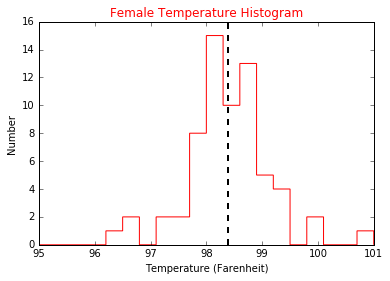

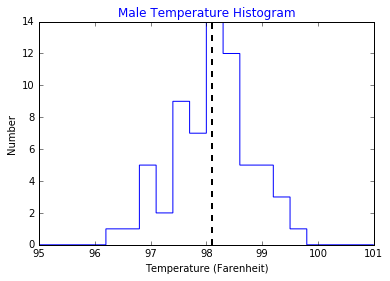

In [47]:
#Female vs. Male Temperature: Histogram Plots
FemStats = df[df.gender=='F'].temperature
MenStats = df[df.gender=='M'].temperature

plt.hist(FemStats, bins=20, range=[95,101], histtype='step', color='red')
plt.axvline(FemStats.mean(), linewidth=2, color='k', linestyle='dashed')
plt.title('Female Temperature Histogram', color='r')
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Number')
plt.show()

plt.hist(MenStats, bins=20, range=[95,101], histtype='step', color='blue')
plt.axvline(MenStats.mean(), linewidth=2, color='k', linestyle='dashed')
plt.title('Male Temperature Histogram', color='b')
plt.xlabel('Temperature (Farenheit)')
plt.ylabel('Number')
plt.show()